In [1]:
!pip install tldextract
!pip install tld
!pip install gdown

import time
import pandas as pd
import seaborn as sns #vẽ đồ thị thống kê và biểu đồ
import matplotlib.pyplot as plt #vẽ đồ thị và biểu đồ

from urllib.parse import urlparse #module của thư viện urllib, được sử dụng để phân tích các thành phần của URL như scheme, netloc, path, params, query, và fragment
import tldextract #trích xuất các thành phần của một URL, bao gồm tên miền, tên miền cấp cao nhất (TLD), và tên miền phụ
import re #hỗ trợ cho các biểu thức chính quy (regular expressions)
from tld import get_tld # lấy top level domain (com, xyz, ...)
import string
from collections import Counter
import math

from yellowbrick.features import Rank1D

In [2]:
# Google colab
# from google.colab import drive
# drive.mount('/content/drive', force_remount = True)

In [3]:
# google colab
# df = pd.read_csv("/content/drive/MyDrive/dataset/URL_DETECTION/Dataset_URL.csv")
# df

In [4]:
# alexa = pd.read_csv('/content/drive/MyDrive/dataset/URL_DETECTION/top-1m.csv', header=None, names=['rank', 'domain'])
# alexa

In [2]:
!gdown --id 101f3u7CkwHxAm1TzVg5vhJehmvONNmYd

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=101f3u7CkwHxAm1TzVg5vhJehmvONNmYd
To: /kaggle/working/dataset.csv
100%|██████████████████████████████████████| 19.2M/19.2M [00:00<00:00, 33.3MB/s]


In [6]:
!gdown --id 1SBJ6D9HoV6oT6ndHidowyFZkp1hpAnwm

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1SBJ6D9HoV6oT6ndHidowyFZkp1hpAnwm
To: /kaggle/working/top-1m.csv
100%|███████████████████████████████████████| 22.2M/22.2M [00:00<00:00, 200MB/s]


In [7]:
df = pd.read_csv("/kaggle/working/dataset.csv")
df

,url,label
0,http://www.updateall.000a.biz,1
1,http://atualizacaoitoken2.06v.br.ms/,1
2,https://yted.weebly.com/,1
3,http://www.nbyixing.com/pro/?us.battle.net/log...,1
4,https://www.delconewsnetwork.com/articles/2011...,0
...,...,...
288153,https://estafetaofp.top/address,1
288154,https://www.npr.org/blogs/therecord/2011/04/18...,0
288155,https://www.century21jm.com,0
288156,http://www.flash.governmentmm.com,1


In [8]:
alexa = pd.read_csv("/kaggle/working/top-1m.csv", header=None, names=['rank', 'domain'])
alexa

,rank,domain
0,1,google.com
1,2,youtube.com
2,3,facebook.com
3,4,baidu.com
4,5,wikipedia.org
...,...,...
999995,999996,sibf.org
999996,999997,bukapintu.co
999997,999998,klatovynet.cz
999998,999999,elconquistadorfm.cl


In [9]:
alexa_domains = alexa['domain'].values
alexa_domains

array(['google.com', 'youtube.com', 'facebook.com', ..., 'klatovynet.cz',
       'elconquistadorfm.cl', 'laputertienda.com'], dtype=object)

In [10]:
class FeatureExtraction:
  def __init__(self):
    pass

  def IpAddress(self, url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        return 1
    else:
        return 0

  def UrlLength(self, url):
    return len(url)

  def HostnameLength(self, url):
    try:
      return len(urlparse(url).hostname)
    except:
      return 0

  def PathLength(self, url):
    try:
        parsed_url = urlparse(url)
        return len(parsed_url.path)
    except:
        return 0

  def QueryLength(self, url):
    try:
        parsed_url = urlparse(url)
        return len(parsed_url.query)
    except:
        return 0

  def UseShortService(self, url):
    #listing shortening services
    shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                          r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                          r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                          r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                          r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                          r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                          r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                          r"tr\.im|link\.zip\.net"

    return 1 if re.search(shortening_services,url) else 0

  def SusTlds(self, url):
    suspicious_tlds = [
      'tk', 'pw', 'info', 'biz', 'xyz', 'top', 'club', 'work', 'online',
      'site', 'website', 'space', 'click', 'link', 'download', 'trade', 'cn'
      'review', 'party', 'win', 'stream', 'gdn', 'racing', 'science', 'net'
      'gq', 'icu', 'ooo', 'mobi', 'fun', 'buzz', 'kim', 'ga', 'cf', 'org', 'ml', 'co', 'ru'
    ]
    try:
      tld = get_tld(url)
      if tld in suspicious_tlds: return 1
      else: return 0
    except:
      return 1

  def NumSensitiveWords(self, url):
    words = ['number', 'update', 'fraud', 'spoof', 'bank', 'banking', 'paypal', 'spoofing', 'credit', 'confirm', 
            'free', 'webscr', 'payment', 'secure', 'PayPal', 'password', 'bonus', 'identity', 'lucky', 'social', 'money', 'account', 
            'transfer', 'ebayisapi', 'keylogger', 'card', 'verify', 'sign in', 'ssn', 'service', 'signin', 'login']
    word_count = sum(url.count(word) for word in words)
    return word_count

  def NumNumericChars(self, url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits += 1
    return digits

  def NumDots(self, url):
    return url.count('.')

  def NumDash(self, url):
    return url.count('-')

  def NumDashInHostname(self, url):
    try:
        url_info = tldextract.extract(url)
        hostname = url_info.domain
        return hostname.count('-')
    except:
        return 0
    
  def NumUnderscore(self, url):
    return url.count('_')

  def NumPercent(self, url):
    return url.count("%")

  def NumAmpersand(self, url):
    return url.count("&")

  def NumHash(self, url):
    return url.count("#")

  def NumQueryComponents(self, url):
    try:
        parsed_url = urlparse(url)
        return len(parsed_url.query.split('&')) if parsed_url.query else 0
    except:
        return 0
    
  def AtSymbol(self, url):
    return 1 if "@" in url else 0

  def TildeSymbol(self, url):
    return 1 if "~" in url else 0

  def DoubleSlashInPath(self, url):
    pos = url.rfind('//')
    if pos > 6:
      return 1 if pos > 7 else 0
    return 0

  def SubDomainLevel(self, url):
    try:
        url_info = tldextract.extract(url)
        subdomain = url_info.subdomain
        if subdomain:
            return subdomain.count('.') + 1
        else:
            return 0
    except:
        return 0

  def PathLevel(self, url):
    try:
        parsed_url = urlparse(url)
        if parsed_url.path:
            return parsed_url.path.count('/') + 1
        else:
            return 0
    except:
        return 0

  def DomainInSubdomains(self, url):
    try:
        url_info = tldextract.extract(url)
        tld = get_tld(url, fail_silently=True)
        if tld:
            return 1 if tld in url_info.subdomain else 0
        else:
            return 1
    except:
        return 1

  def DomainInPaths(self, url):
    try:
        parsed_url = urlparse(url)
        tld = get_tld(url, fail_silently=True)
        if tld:
            return 1 if tld in parsed_url.path else 0
        else:
            return 1
    except:
        return 1

#   def NoHttps(self, url):
#     try:
#         parsed_url = urlparse(url)
#         return 0 if parsed_url.scheme == 'https' else 1
#     except:
#         return 1
    
  def EntropyDomainName(self, url):
    try:
        hostname = urlparse(url).netloc
        counter = Counter(hostname)
        probabilities = [count / len(hostname) for count in counter.values()]
        return -sum(p * math.log2(p) for p in probabilities)
    except:
        return 0
    
  def rank_host(self, url):
    try:
        domain = tldextract.extract(url).registered_domain
        return 0 if domain in alexa_domains else 1
    except Exception:
        return 1
    

In [11]:
feature = FeatureExtraction()
df_ex = df.copy()

In [12]:
for func_name in dir(FeatureExtraction):
    if not func_name.startswith('__') and callable(getattr(FeatureExtraction, func_name)):
        df_ex[func_name] = df_ex['url'].apply(getattr(feature, func_name))

# Trộn ngẫu nhiên các dòng dữ liệu để đảm bảo phân phối đều khi chia tập train và test.
df_ex = df_ex.sample(frac = 1).reset_index(drop = True)

In [3]:
!gdown --id 1qgIR8naCjN0an7jECbkrYbEcy6_h52T4

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qgIR8naCjN0an7jECbkrYbEcy6_h52T4
To: /kaggle/working/URL_Feature.csv
100%|███████████████████████████████████████| 40.6M/40.6M [00:00<00:00, 145MB/s]


In [4]:
df_ex = pd.read_csv("/kaggle/working/URL_Feature.csv")

In [6]:
df_ex

,url,label,AtSymbol,DomainInPaths,DomainInSubdomains,DoubleSlashInPath,EntropyDomainName,HostnameLength,IpAddress,NoHttps,...,NumUnderscore,PathLength,PathLevel,QueryLength,SubDomainLevel,SusTlds,TildeSymbol,UrlLength,UseShortService,rank_host
0,http://alert. policecoin.info/FI/cls.php,1,0,0,0,0,3.572624,22,0,1,...,0,11,3,0,1,1,0,40,0,1
1,http://www.r1.panjo.club,1,0,0,0,0,3.528064,17,0,1,...,0,0,0,0,2,1,0,24,0,1
2,https://www.financialpost.com/opinion/columnis...,0,0,0,0,0,3.594466,21,0,0,...,0,41,4,0,1,0,0,70,1,0
3,https://www.wdpro.disneycareers.com/en/default/,0,0,0,0,0,3.633974,27,0,0,...,0,12,4,0,2,0,0,47,0,0
4,https://dev-ficohsaonline.pantheonsite.io/conf...,1,0,0,0,0,3.771667,33,0,0,...,0,12,2,12,1,0,0,66,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288153,http://capitalcitytoystore.ca/mary/documents,1,0,0,0,0,3.390805,22,0,1,...,0,15,3,0,0,0,0,44,0,1
288154,http://www.m-noack.de/uploads/template/coalais...,1,0,0,0,0,3.324863,14,0,1,...,1,36,5,16,1,0,0,74,0,1
288155,https://assessoria-cred.com/,1,0,0,0,0,3.300559,19,0,0,...,0,1,2,0,0,0,0,28,0,1
288156,https://www.citytech.cuny.edu/academics/deptsi...,0,0,0,0,0,3.332095,21,0,0,...,0,39,5,0,2,0,0,68,0,0


# EDA

In [7]:
fe = df_ex.copy()
fe.drop(['url', 'NoHttps'], axis=1, inplace=True)

In [8]:
# Tạo ra một tóm tắt thống kê của các giá trị trong DataFrame
# mean: Trung bình cộng của các giá trị trong cột.
# std: Độ lệch chuẩn của các giá trị trong cột.
# min: Giá trị nhỏ nhất trong cột.
# 25%: Giá trị thứ 25 (phân vị thứ 1/4) trong cột.
# 50%: Giá trị thứ 50 (phân vị thứ 2/4) trong cột.
# 75%: Giá trị thứ 75 (phân vị thứ 3/4) trong cột.
# max: Giá trị lớn nhất trong cột.
fe.describe()

,label,AtSymbol,DomainInPaths,DomainInSubdomains,DoubleSlashInPath,EntropyDomainName,HostnameLength,IpAddress,NumAmpersand,NumDash,...,NumUnderscore,PathLength,PathLevel,QueryLength,SubDomainLevel,SusTlds,TildeSymbol,UrlLength,UseShortService,rank_host
count,288158.000000,288158.000000,288158.000000,288158.000000,288158.000000,288158.000000,288158.000000,288158.000000,288158.000000,288158.000000,...,288158.000000,288158.000000,288158.000000,288158.000000,288158.000000,288158.000000,288158.000000,288158.000000,288158.000000,288158.000000
mean,0.500000,0.011820,0.040422,0.017456,0.007142,3.493218,22.734177,0.006576,0.150532,1.343221,...,0.350960,26.286381,3.172506,6.525739,1.071416,0.123516,0.009071,63.495027,0.073807,0.620601
std,0.500001,0.108075,0.196948,0.130962,0.084208,0.409164,13.531794,0.080827,0.840008,2.542210,...,1.205414,27.396476,1.920878,24.508297,1.028752,0.329029,0.094811,37.919683,0.261457,0.485238
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,3.240224,16.000000,0.000000,0.000000,0.000000,...,0.000000,4.000000,2.000000,0.000000,1.000000,0.000000,0.000000,39.000000,0.000000,0.000000
50%,0.500000,0.000000,0.000000,0.000000,0.000000,3.500284,20.000000,0.000000,0.000000,0.000000,...,0.000000,19.000000,3.000000,0.000000,1.000000,0.000000,0.000000,54.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,3.740953,26.000000,0.000000,0.000000,2.000000,...,0.000000,39.000000,4.000000,0.000000,1.000000,0.000000,0.000000,76.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,5.070529,244.000000,1.000000,37.000000,41.000000,...,64.000000,463.000000,103.000000,706.000000,33.000000,1.000000,1.000000,779.000000,1.000000,1.000000


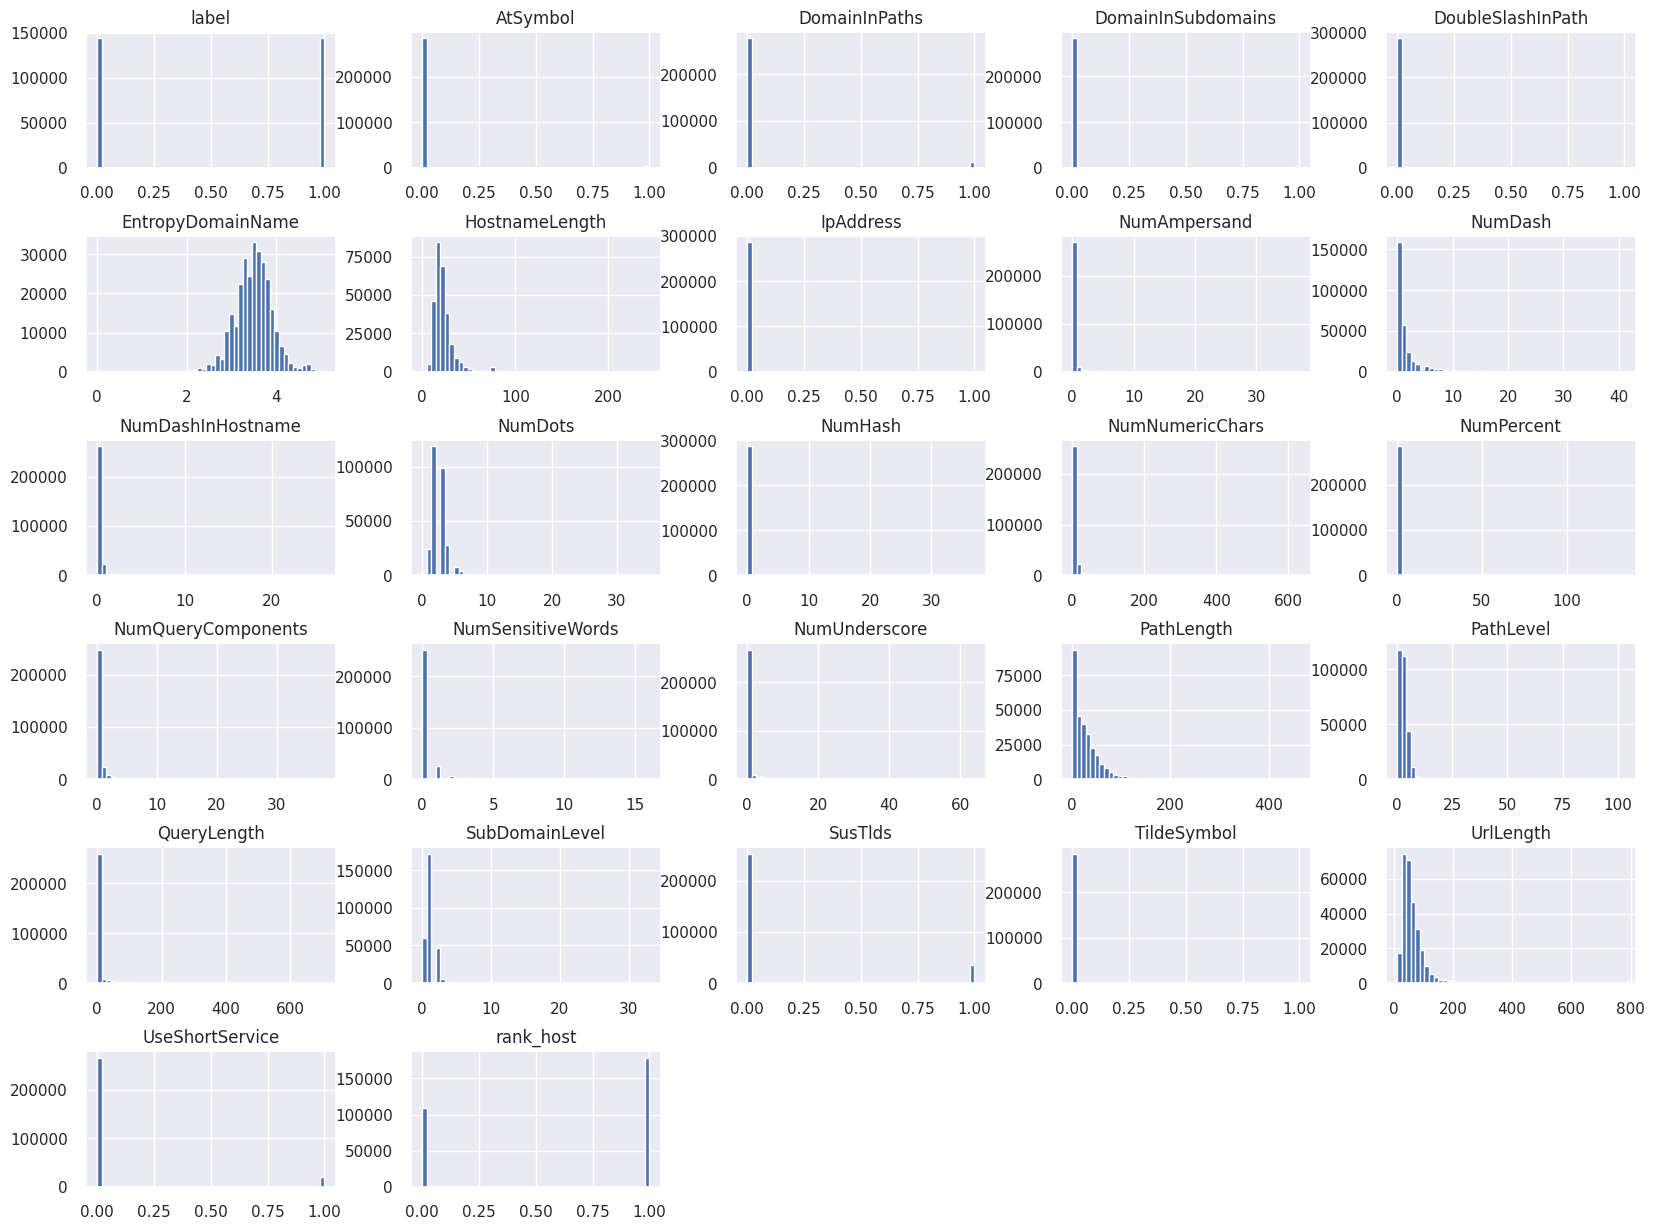

In [28]:
fe.hist(bins=50, figsize=(20, 15));
plt.subplots_adjust(hspace=0.5)
plt.show()

<Axes: >

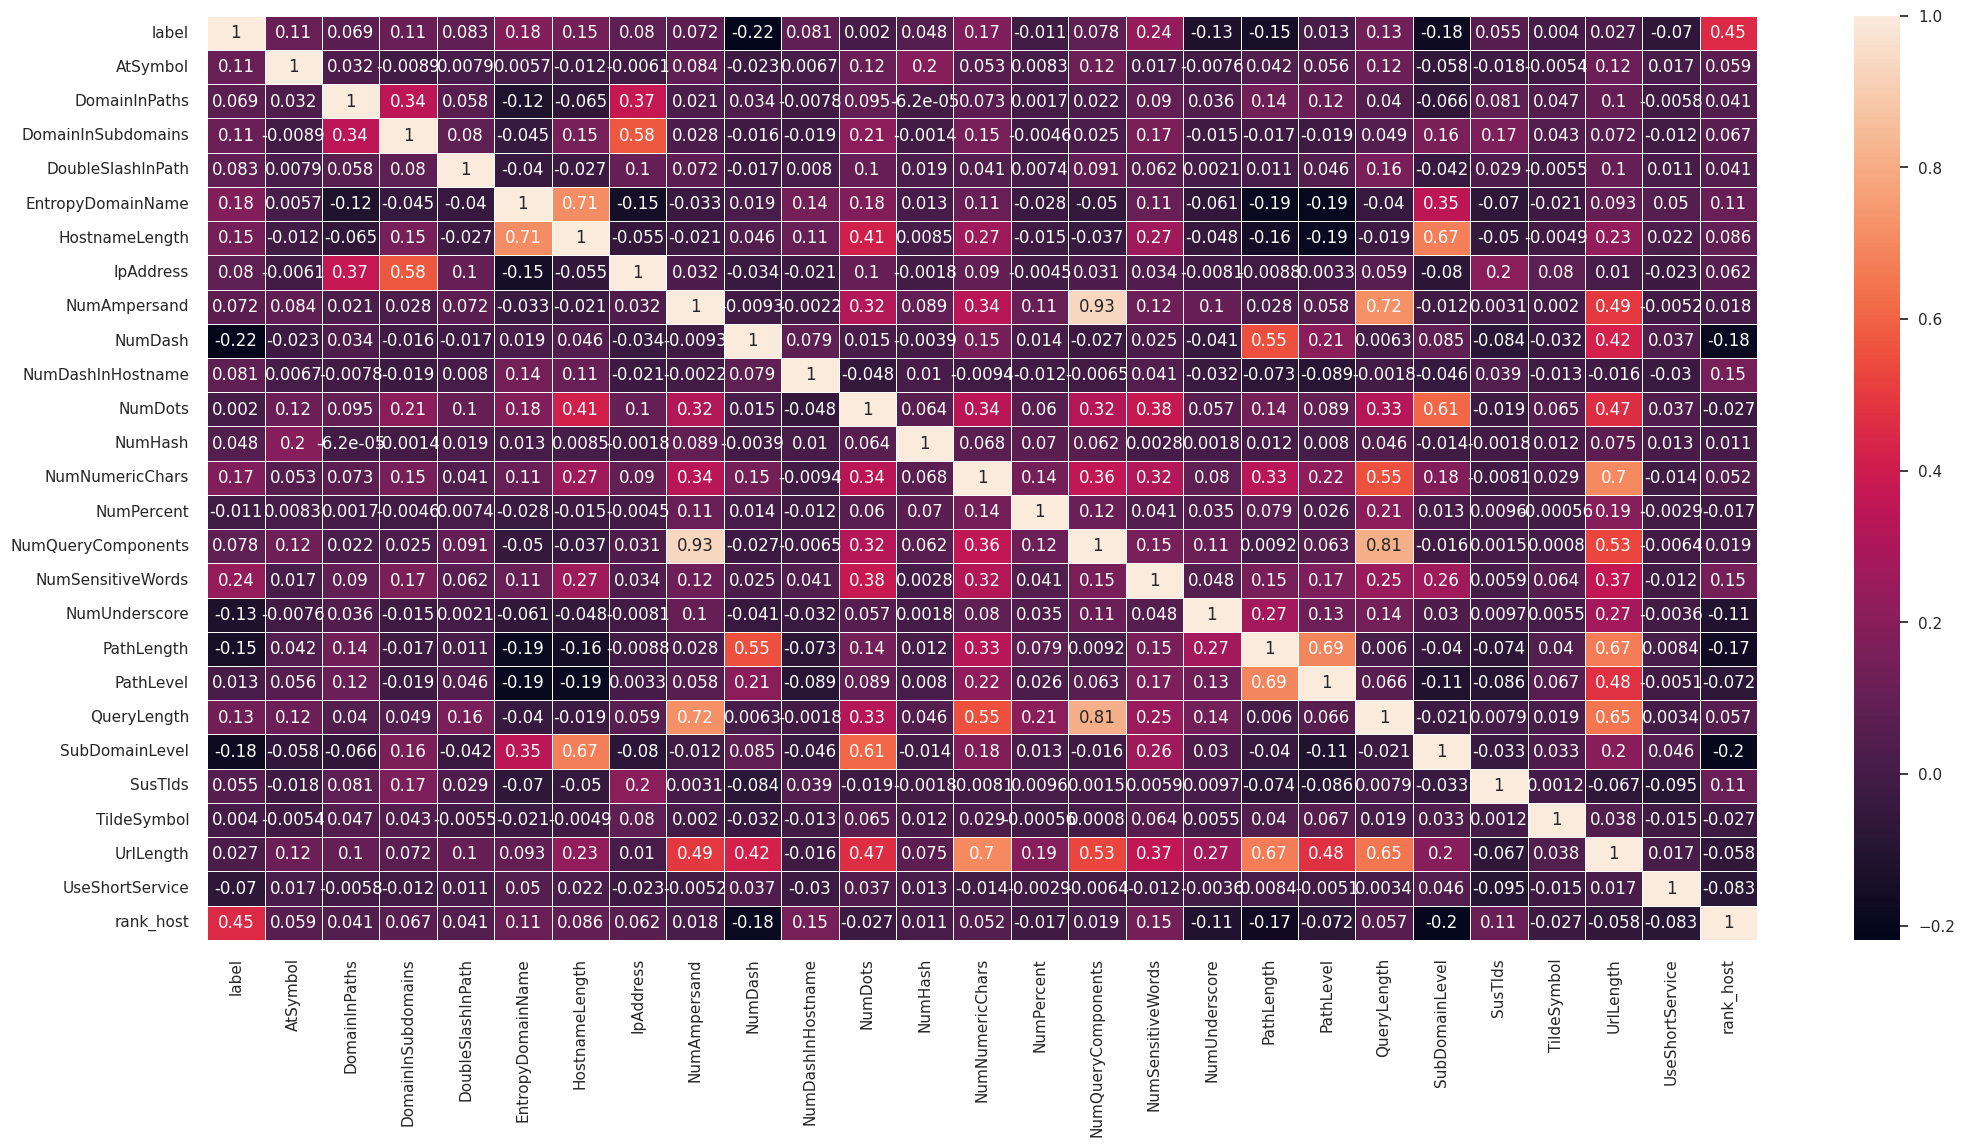

In [31]:
# Tạo biểu đồ HeatMap
plt.figure(figsize = (25, 12)) # Rộng: 25, Cao: 12
# Tạo HeatMap với thông số:
# Hiển thị giá trị tương quan trên từng ô của HeatMap.
# Điều chỉnh độ dày đường viền của các ô.
sns.heatmap(fe.corr(),annot = True, linewidth = 0.5)

In [11]:
fe.columns

Index(['label', 'AtSymbol', 'DomainInPaths', 'DomainInSubdomains',
       'DoubleSlashInPath', 'EntropyDomainName', 'HostnameLength', 'IpAddress',
       'NumAmpersand', 'NumDash', 'NumDashInHostname', 'NumDots', 'NumHash',
       'NumNumericChars', 'NumPercent', 'NumQueryComponents',
       'NumSensitiveWords', 'NumUnderscore', 'PathLength', 'PathLevel',
       'QueryLength', 'SubDomainLevel', 'SusTlds', 'TildeSymbol', 'UrlLength',
       'UseShortService', 'rank_host'],
      dtype='object')

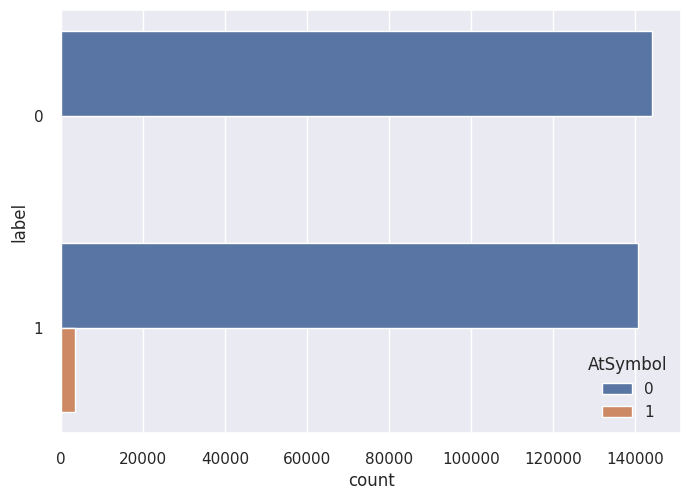

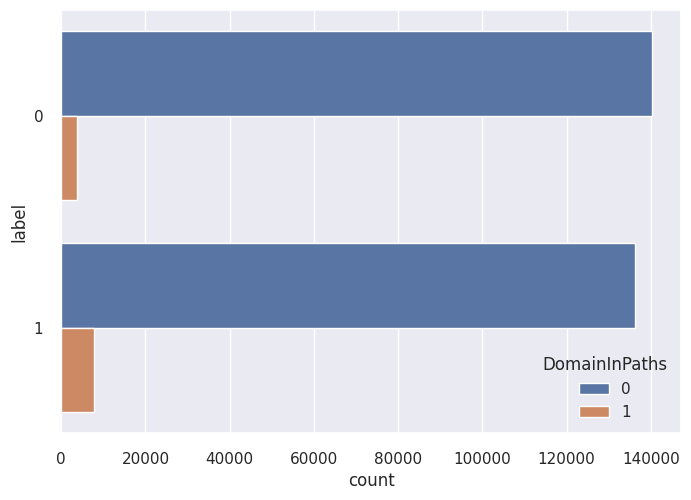

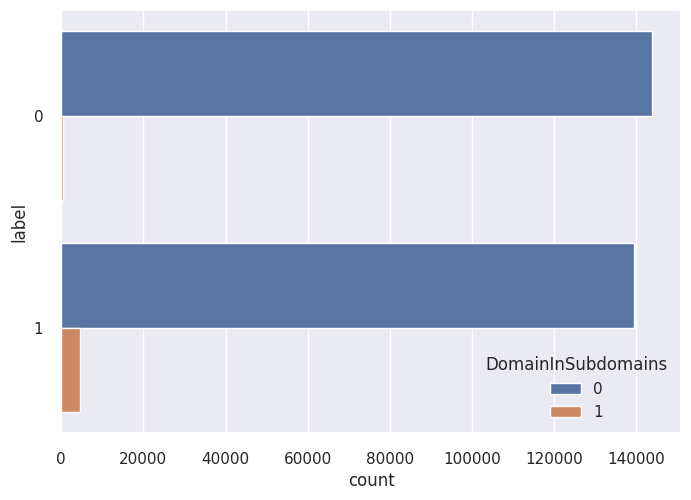

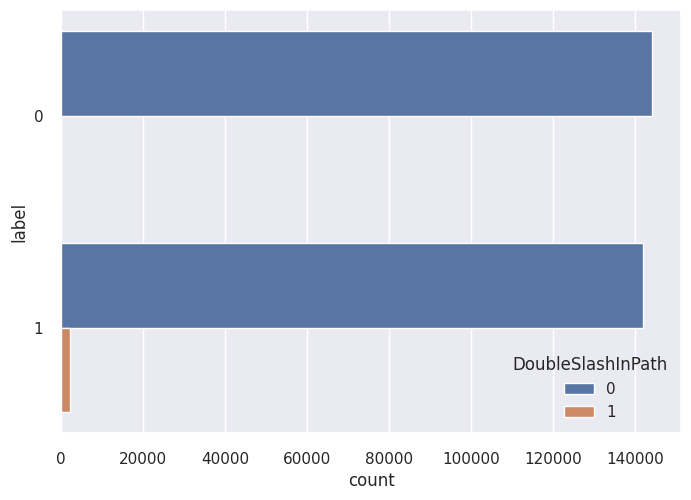

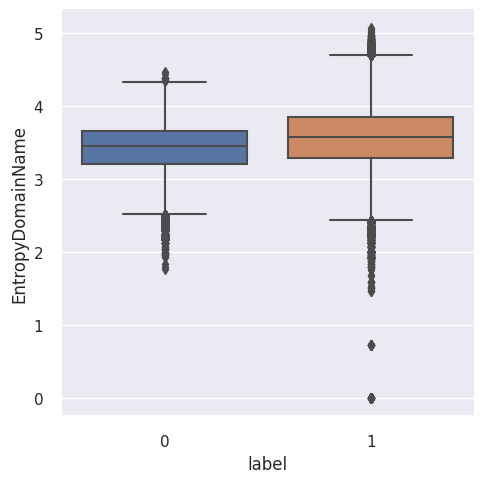

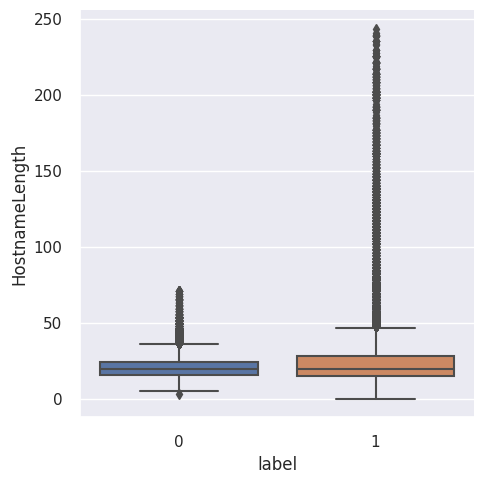

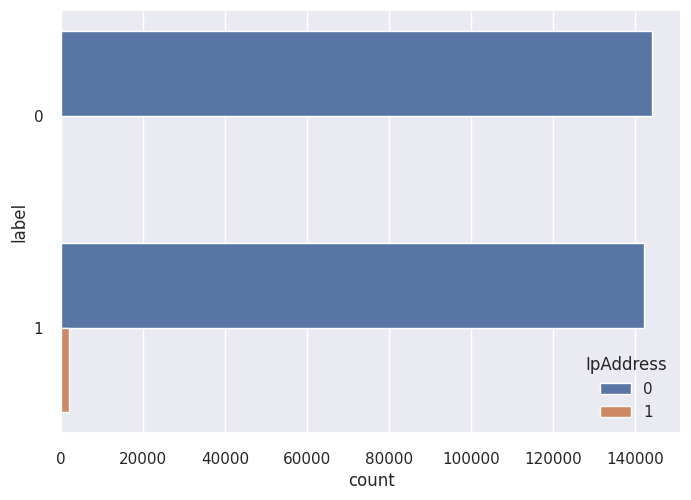

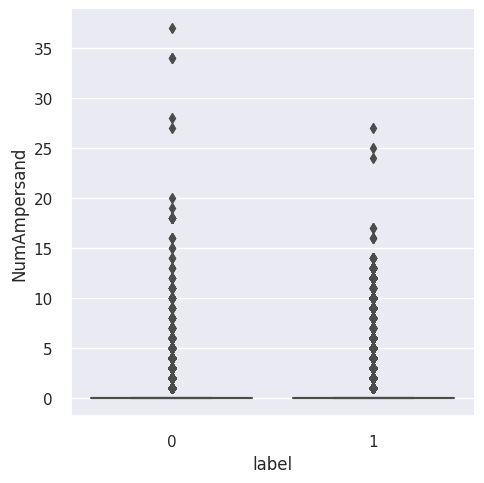

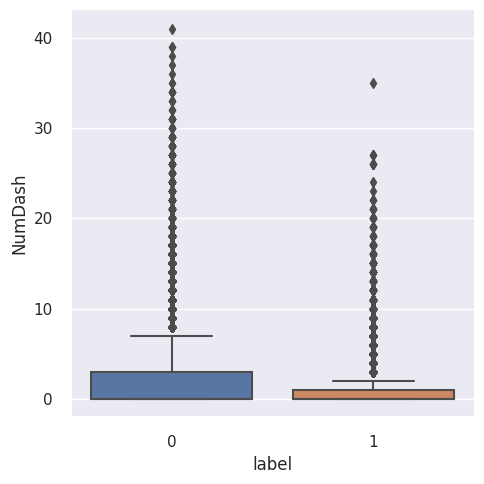

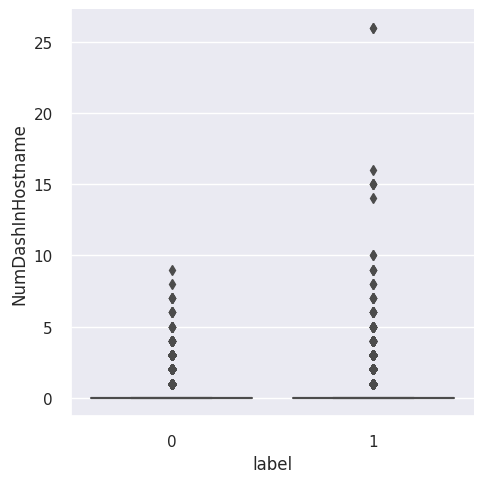

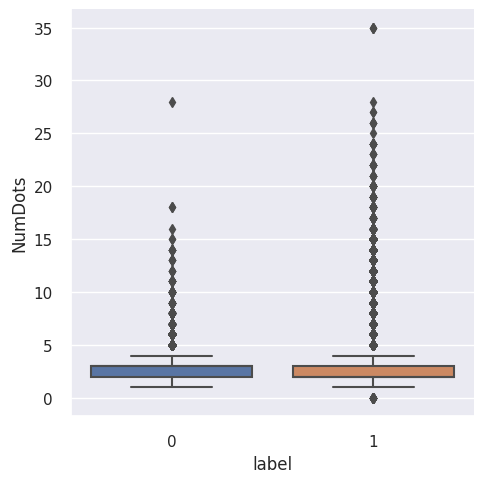

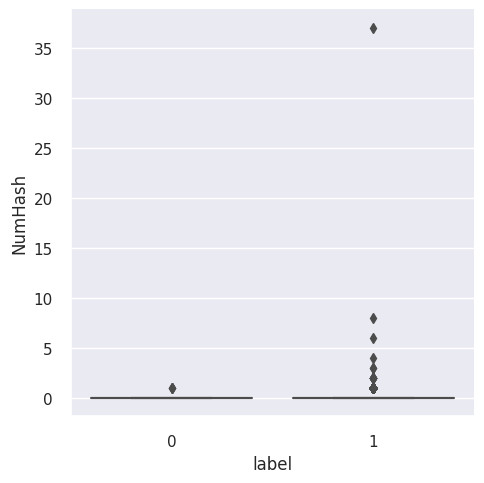

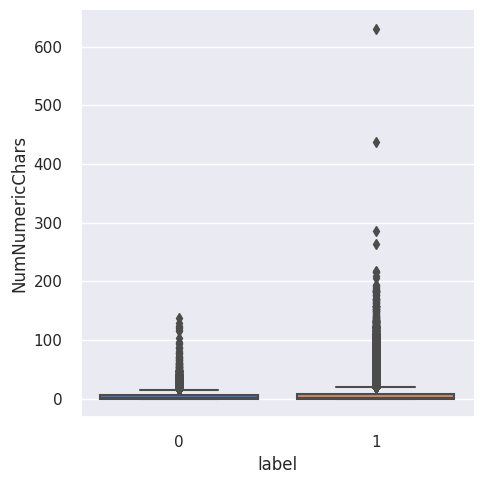

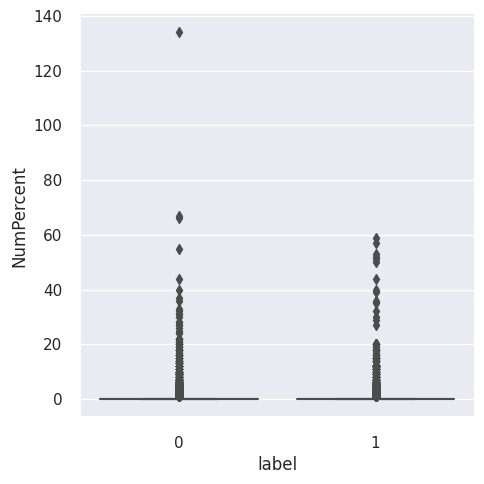

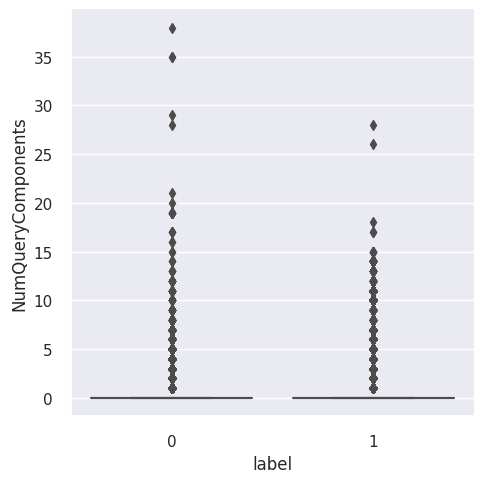

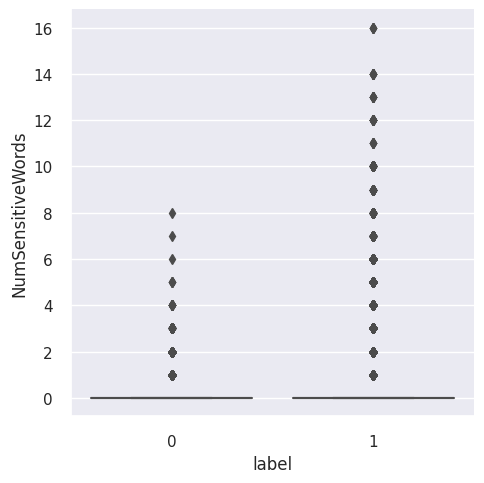

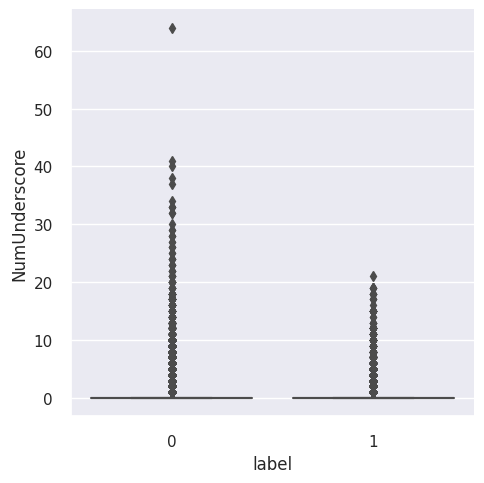

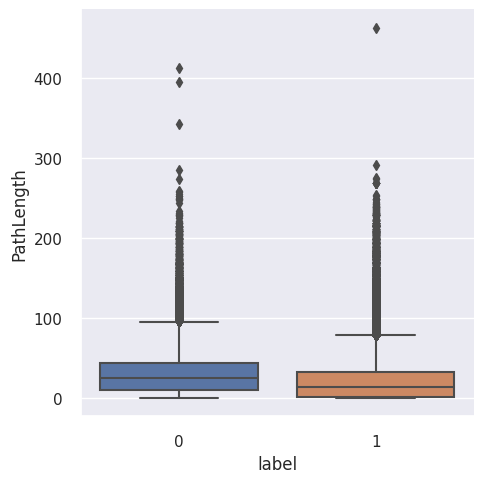

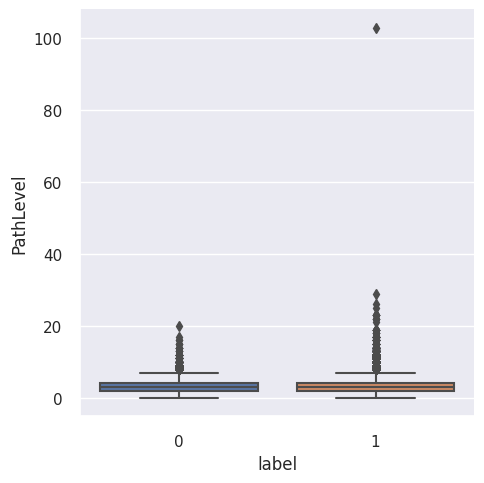

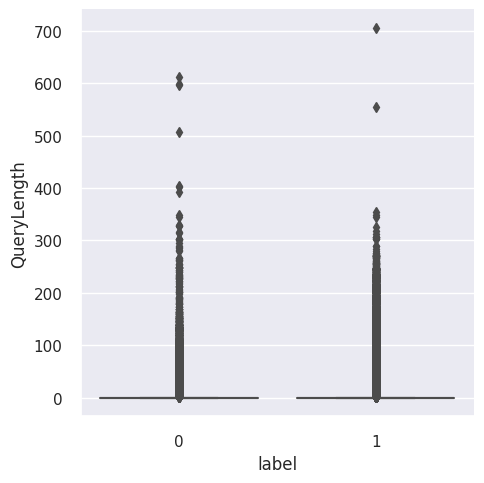

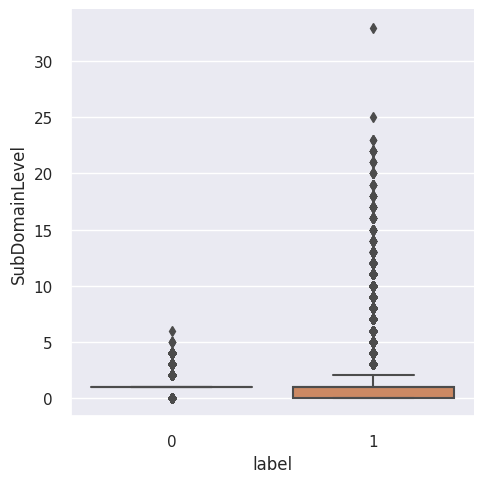

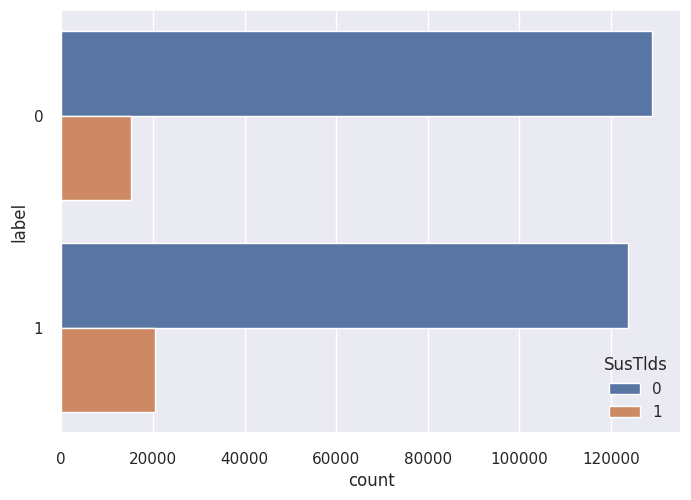

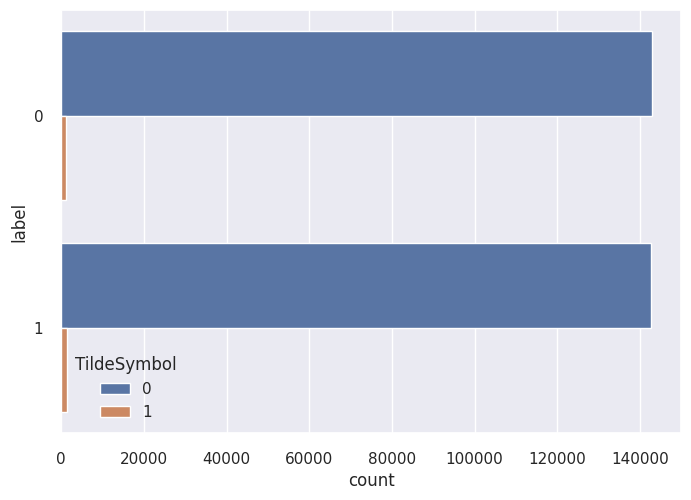

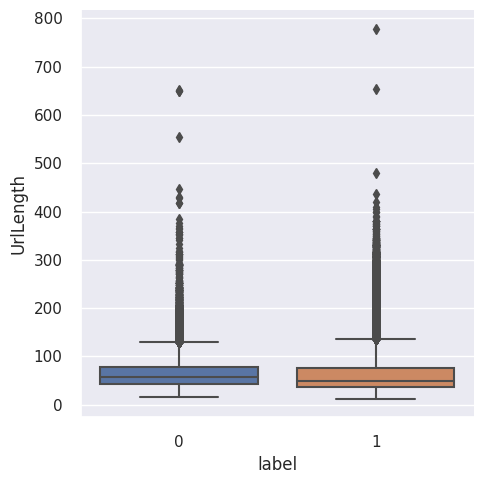

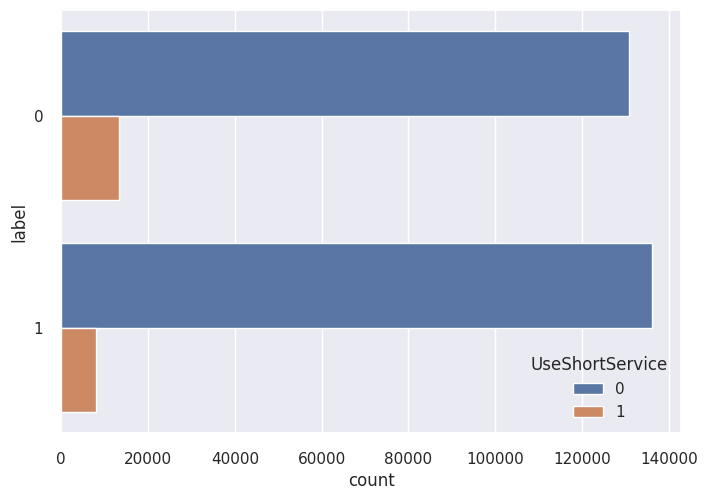

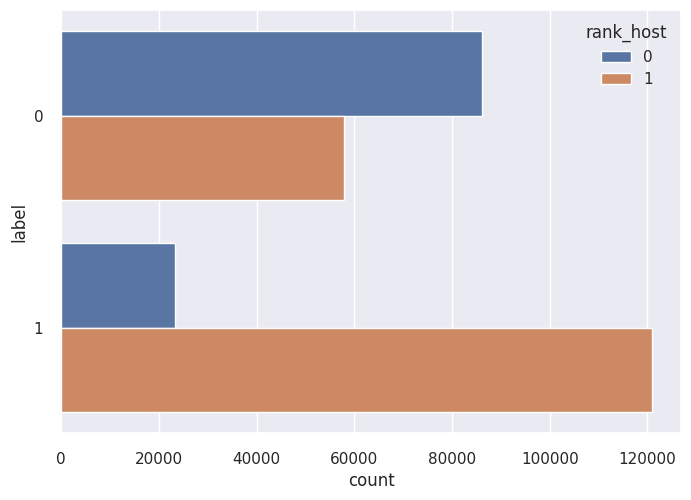

In [18]:
sns.set(style="darkgrid")

columns = [col for col in fe.columns if col != 'label']

for col in columns:
    # Kiểm tra nếu cột chỉ chứa các giá trị 0 và 1
    if fe[col].nunique() == 2 and fe[col].isin([0, 1]).all():
        # Vẽ countplot
        ax = sns.countplot(y="label", data=fe, hue=col)
        plt.show()
    else:
        # Vẽ catplot
        sns.catplot(x="label", y=col, kind="box", data=fe)
        plt.show()

/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


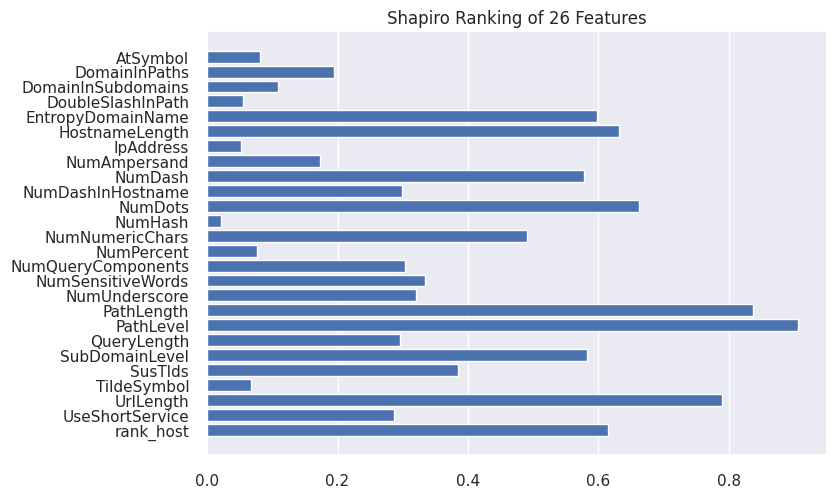

<Axes: title={'center': 'Shapiro Ranking of 26 Features'}>

In [14]:
# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
X = fe.copy().drop("label", axis=1)
Y = fe.copy()["label"]

features = X.columns.tolist()

visualizer = Rank1D(features=features, algorithm='shapiro')
visualizer.fit_transform(X=X.astype(int), y=Y)
visualizer.poof()

In [ ]:
df_ex.to_csv("URL_Feature.csv", index=False)